While CSV is simple and the most widely used data format (Excel, Google Sheets), there are several distinct advantages for Parquet, including:

* Parquet is column oriented and CSV is row oriented. Row-oriented formats are optimized for OLTP workloads while column-oriented formats are better suited for analytical workloads.
* Column-oriented databases such as AWS Redshift Spectrum bill by the amount data scanned per query
* Therefore, converting CSV to Parquet with partitioning and compression lowers overall costs and improves performance

In [1]:
#import os
#
#os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
#os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
#
#os.environ["MODIN_ENGINE"] = "unidist" # Modin will use Unidist
#os.environ["UNIDIST_BACKEND"] = "mpi" # Unidist will use MPI backend
#
#import modin.pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Read the parquet file into a pandas dataframe
df = pd.read_parquet('SnowStorageDATA.parquet')
df

,YEAR,MO,DY,HR,PRECTOTCORR,Unnamed: 5,time,temperature_2m (°C),YEAR.1,MO.1,DY.1,HR.1,ALLSKY_SFC_SW_DWN,time.1,wind_speed_10m (km/h),Unnamed: 15,time.2,relative_humidity_2m (%)
0,2023,1,1,0,0.06,0.00006,2023-01-01T00:00,5.4,2023.0,1.0,1.0,0.0,0.0,2023-01-01T00:00,25.6,7.1,2023-01-01T00:00,91
1,2023,1,1,1,0.03,0.00003,2023-01-01T01:00,5.2,2023.0,1.0,1.0,1.0,0.0,2023-01-01T01:00,24.1,6.7,2023-01-01T01:00,91
2,2023,1,1,2,0.02,0.00002,2023-01-01T02:00,5.1,2023.0,1.0,1.0,2.0,0.0,2023-01-01T02:00,24.8,6.9,2023-01-01T02:00,90
3,2023,1,1,3,0.01,0.00001,2023-01-01T03:00,4.8,2023.0,1.0,1.0,3.0,0.0,2023-01-01T03:00,23.8,6.6,2023-01-01T03:00,90
4,2023,1,1,4,0.01,0.00001,2023-01-01T04:00,4.4,2023.0,1.0,1.0,4.0,0.0,2023-01-01T04:00,23.4,6.5,2023-01-01T04:00,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023,12,31,19,0.00,0.00000,2023-12-31T19:00,-5.6,NaN,NaN,NaN,NaN,NaN,2023-12-31T19:00,12.6,3.5,2023-12-31T19:00,80
8756,2023,12,31,20,0.00,0.00000,2023-12-31T20:00,-5.3,NaN,NaN,NaN,NaN,NaN,2023-12-31T20:00,11.2,3.1,2023-12-31T20:00,79
8757,2023,12,31,21,0.01,0.00001,2023-12-31T21:00,-5.6,NaN,NaN,NaN,NaN,NaN,2023-12-31T21:00,9.7,2.7,2023-12-31T21:00,80
8758,2023,12,31,22,0.02,0.00002,2023-12-31T22:00,-6.3,NaN,NaN,NaN,NaN,NaN,2023-12-31T22:00,6.8,1.9,2023-12-31T22:00,84


In [2]:
# Find the index where the first NaN value appears in the 'YEAR.1' column
first_nan_index = df['YEAR.1'].isna().idxmax()
first_nan_index

8736

In [3]:
# Drop all rows after the first NaN value in the 'YEAR.1' column
df_wo_nan = df.loc[:first_nan_index-1]
df_wo_nan

,YEAR,MO,DY,HR,PRECTOTCORR,Unnamed: 5,time,temperature_2m (°C),YEAR.1,MO.1,DY.1,HR.1,ALLSKY_SFC_SW_DWN,time.1,wind_speed_10m (km/h),Unnamed: 15,time.2,relative_humidity_2m (%)
0,2023,1,1,0,0.06,0.00006,2023-01-01T00:00,5.4,2023.0,1.0,1.0,0.0,0.0,2023-01-01T00:00,25.6,7.1,2023-01-01T00:00,91
1,2023,1,1,1,0.03,0.00003,2023-01-01T01:00,5.2,2023.0,1.0,1.0,1.0,0.0,2023-01-01T01:00,24.1,6.7,2023-01-01T01:00,91
2,2023,1,1,2,0.02,0.00002,2023-01-01T02:00,5.1,2023.0,1.0,1.0,2.0,0.0,2023-01-01T02:00,24.8,6.9,2023-01-01T02:00,90
3,2023,1,1,3,0.01,0.00001,2023-01-01T03:00,4.8,2023.0,1.0,1.0,3.0,0.0,2023-01-01T03:00,23.8,6.6,2023-01-01T03:00,90
4,2023,1,1,4,0.01,0.00001,2023-01-01T04:00,4.4,2023.0,1.0,1.0,4.0,0.0,2023-01-01T04:00,23.4,6.5,2023-01-01T04:00,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,2023,12,30,19,0.11,0.00011,2023-12-30T19:00,0.0,2023.0,12.0,30.0,19.0,0.0,2023-12-30T19:00,25.2,7.0,2023-12-30T19:00,89
8732,2023,12,30,20,0.09,0.00009,2023-12-30T20:00,-0.4,2023.0,12.0,30.0,20.0,0.0,2023-12-30T20:00,25.9,7.2,2023-12-30T20:00,86
8733,2023,12,30,21,0.08,0.00008,2023-12-30T21:00,-0.8,2023.0,12.0,30.0,21.0,0.0,2023-12-30T21:00,23.8,6.6,2023-12-30T21:00,85
8734,2023,12,30,22,0.07,0.00007,2023-12-30T22:00,-1.0,2023.0,12.0,30.0,22.0,0.0,2023-12-30T22:00,23.4,6.5,2023-12-30T22:00,84


In [4]:
# Find the index where 'time.1' starts at '2023-04-01T00:00'
period_start_in = df[df['time.1'] == '2023-04-01T00:00'].index[0]

# Find the index where 'time.1' ends at '2023-05-01T00:00' (example stop period)
period_end_in = df[df['time.1'] == '2023-08-31T23:00'].index[0]

# Slice the DataFrame to include only the desired period
df_wo_nan_period = df_wo_nan.loc[period_start_in:period_end_in]

df_wo_nan_period

,YEAR,MO,DY,HR,PRECTOTCORR,Unnamed: 5,time,temperature_2m (°C),YEAR.1,MO.1,DY.1,HR.1,ALLSKY_SFC_SW_DWN,time.1,wind_speed_10m (km/h),Unnamed: 15,time.2,relative_humidity_2m (%)
2160,2023,4,1,0,0.00,0.00000,2023-04-01T00:00,0.2,2023.0,4.0,1.0,0.0,0.00,2023-04-01T00:00,21.6,6.0,2023-04-01T00:00,72
2161,2023,4,1,1,0.01,0.00001,2023-04-01T01:00,0.1,2023.0,4.0,1.0,1.0,0.00,2023-04-01T01:00,22.0,6.1,2023-04-01T01:00,75
2162,2023,4,1,2,0.01,0.00001,2023-04-01T02:00,-0.1,2023.0,4.0,1.0,2.0,0.00,2023-04-01T02:00,23.4,6.5,2023-04-01T02:00,65
2163,2023,4,1,3,0.01,0.00001,2023-04-01T03:00,-0.2,2023.0,4.0,1.0,3.0,0.00,2023-04-01T03:00,23.4,6.5,2023-04-01T03:00,77
2164,2023,4,1,4,0.00,0.00000,2023-04-01T04:00,-0.4,2023.0,4.0,1.0,4.0,34.09,2023-04-01T04:00,25.2,7.0,2023-04-01T04:00,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,2023,8,31,19,0.00,0.00000,2023-08-31T19:00,17.5,2023.0,8.0,31.0,19.0,0.00,2023-08-31T19:00,14.4,4.0,2023-08-31T19:00,86
5828,2023,8,31,20,0.00,0.00000,2023-08-31T20:00,17.1,2023.0,8.0,31.0,20.0,0.00,2023-08-31T20:00,14.8,4.1,2023-08-31T20:00,88
5829,2023,8,31,21,0.00,0.00000,2023-08-31T21:00,16.9,2023.0,8.0,31.0,21.0,0.00,2023-08-31T21:00,13.7,3.8,2023-08-31T21:00,91
5830,2023,8,31,22,0.01,0.00001,2023-08-31T22:00,16.5,2023.0,8.0,31.0,22.0,0.00,2023-08-31T22:00,13.0,3.6,2023-08-31T22:00,91


In [5]:
# Reset indecies for new dataframe
df_wo_nan_period_reset = df_wo_nan_period.reset_index(drop=True)
df_wo_nan_period_reset

,YEAR,MO,DY,HR,PRECTOTCORR,Unnamed: 5,time,temperature_2m (°C),YEAR.1,MO.1,DY.1,HR.1,ALLSKY_SFC_SW_DWN,time.1,wind_speed_10m (km/h),Unnamed: 15,time.2,relative_humidity_2m (%)
0,2023,4,1,0,0.00,0.00000,2023-04-01T00:00,0.2,2023.0,4.0,1.0,0.0,0.00,2023-04-01T00:00,21.6,6.0,2023-04-01T00:00,72
1,2023,4,1,1,0.01,0.00001,2023-04-01T01:00,0.1,2023.0,4.0,1.0,1.0,0.00,2023-04-01T01:00,22.0,6.1,2023-04-01T01:00,75
2,2023,4,1,2,0.01,0.00001,2023-04-01T02:00,-0.1,2023.0,4.0,1.0,2.0,0.00,2023-04-01T02:00,23.4,6.5,2023-04-01T02:00,65
3,2023,4,1,3,0.01,0.00001,2023-04-01T03:00,-0.2,2023.0,4.0,1.0,3.0,0.00,2023-04-01T03:00,23.4,6.5,2023-04-01T03:00,77
4,2023,4,1,4,0.00,0.00000,2023-04-01T04:00,-0.4,2023.0,4.0,1.0,4.0,34.09,2023-04-01T04:00,25.2,7.0,2023-04-01T04:00,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2023,8,31,19,0.00,0.00000,2023-08-31T19:00,17.5,2023.0,8.0,31.0,19.0,0.00,2023-08-31T19:00,14.4,4.0,2023-08-31T19:00,86
3668,2023,8,31,20,0.00,0.00000,2023-08-31T20:00,17.1,2023.0,8.0,31.0,20.0,0.00,2023-08-31T20:00,14.8,4.1,2023-08-31T20:00,88
3669,2023,8,31,21,0.00,0.00000,2023-08-31T21:00,16.9,2023.0,8.0,31.0,21.0,0.00,2023-08-31T21:00,13.7,3.8,2023-08-31T21:00,91
3670,2023,8,31,22,0.01,0.00001,2023-08-31T22:00,16.5,2023.0,8.0,31.0,22.0,0.00,2023-08-31T22:00,13.0,3.6,2023-08-31T22:00,91


In [6]:
# Extract the air velocity column from the dataframe
df_air_vel = df_wo_nan_period_reset.iloc[:, 15]
df_air_vel

0       6.0
1       6.1
2       6.5
3       6.5
4       7.0
       ... 
3667    4.0
3668    4.1
3669    3.8
3670    3.6
3671    2.8
Name: Unnamed: 15, Length: 3672, dtype: float64

In [7]:
# Extract the air temperature column from the dataframe
df_air_temp = df_wo_nan_period_reset.iloc[:, 7]
df_air_temp

0        0.2
1        0.1
2       -0.1
3       -0.2
4       -0.4
        ... 
3667    17.5
3668    17.1
3669    16.9
3670    16.5
3671    15.8
Name: temperature_2m (°C), Length: 3672, dtype: float64

In [8]:
# Extract the amount of precipitation column from the dataframe
df_am_of_perc = df_wo_nan_period_reset.iloc[:, 5] # m/h
df_am_of_perc

0       0.00000
1       0.00001
2       0.00001
3       0.00001
4       0.00000
         ...   
3667    0.00000
3668    0.00000
3669    0.00000
3670    0.00001
3671    0.00001
Name: Unnamed: 5, Length: 3672, dtype: float64

---
$$
Q_{ground} = \lambda_{ground} A_{ground} \frac{\Delta T_g}{l}
$$

In [9]:
lam = 1.0 # W/(mK); thermal conductivity of the ground
A_ground = 210.0 # m^2; area of the ground
T1 = 0.0 # °C
T2 = 6.0 # °C
dT = T2 - T1
l = 1.0 # m; thickness of the ground
Q_ground = lam * A_ground * dT/l
print(f'The thermal heat energy from the ground is {Q_ground} W.')

The thermal heat energy from the ground is 1260.0 W.


---
$$Q_{melt} = \frac{Q_{ground}}{L_f \cdot \rho_{snow}}$$

In [10]:
L_f = 333.4E03 # J/kg; latent heat of fusion
rho_snow = 411.0 # kg/m^3; density of snow
# The rate of melted snow from ground melt
Q_melt = Q_ground/(L_f * rho_snow)
print(f'The rate of melted snow from ground melt is {Q_melt:.4e} m^3/s.')

The rate of melted snow from ground melt is 9.1952e-06 m^3/s.


---

In [11]:
# Total volume of melted snow due to ground melt
Q_melt_total = Q_melt * 3600 # m^3/h
print(f'The total volume of melted snow due to ground melt is {Q_melt_total:.4f} m^3/h.')

The total volume of melted snow due to ground melt is 0.0331 m^3/h.


In [12]:
df2 = pd.read_parquet('SurfaceMeltRateDATA.parquet')
df2

,G(h)_W/m2,Gb(n)_W/m2,Gd(h)_W/m2,IR(h)_W/m2,RH_%
0,0.00,0.0,0,306.98,72
1,0.00,0.0,0,311.56,75
2,0.00,0.0,0,316.14,65
3,0.00,0.0,0,320.72,77
4,34.09,0.0,0,325.31,78
...,...,...,...,...,...
3667,0.00,0.0,0,303.45,86
3668,0.00,0.0,0,308.59,88
3669,0.00,0.0,0,313.73,91
3670,0.00,0.0,0,318.88,91


Checking if the raw and snowmelt data are the same

In [13]:
# Relative humidity (%)
# Extract the columns to be compared
df_RH_temp = df_wo_nan_period.iloc[:, 17].reset_index(drop=True)
df2_RH = df2.iloc[:, 4].reset_index(drop=True)

# Determine the length of the shorter column
min_length = min(len(df_RH_temp), len(df2_RH))

# Compare the columns up to the length of the shorter column
not_equal_indices = df_RH_temp.iloc[:min_length] != df2_RH.iloc[:min_length]

# Display the rows and the values at each row where they are not equal
for index in not_equal_indices[not_equal_indices].index:
    print(f"Row {index}:")
    print(f"df_RH value: {df_RH_temp.iloc[index]}")
    print(f"df2 value: {df2_RH.iloc[index]}")
    print()

In [14]:
print(len(df_RH_temp))
print(len(df2_RH))

3672
3672


In [15]:
df_RH_temp

0       72
1       75
2       65
3       77
4       78
        ..
3667    86
3668    88
3669    91
3670    91
3671    93
Name: relative_humidity_2m (%), Length: 3672, dtype: int64

In [16]:
df2_RH

0       72
1       75
2       65
3       77
4       78
        ..
3667    86
3668    88
3669    91
3670    91
3671    93
Name: RH_%, Length: 3672, dtype: int64

In [17]:
# Globalr solar irradiance W/m2
df_Gsi = df_wo_nan_period_reset['ALLSKY_SFC_SW_DWN']
df_Gsi

0        0.00
1        0.00
2        0.00
3        0.00
4       34.09
        ...  
3667     0.00
3668     0.00
3669     0.00
3670     0.00
3671     0.00
Name: ALLSKY_SFC_SW_DWN, Length: 3672, dtype: float64

In [18]:
# Heat transfer coefficient at the external surface
h = 22.7 # W/(m^2K)
# Solar light absorptivity
alpha = 0.8
# Correction factor for horizontal surface
T_cor_fact = 4.0 # °C
df_T_sol_air =  alpha * df_Gsi / h + df_air_temp - T_cor_fact
df_T_sol_air

0       -3.80000
1       -3.90000
2       -4.10000
3       -4.20000
4       -3.19859
          ...   
3667    13.50000
3668    13.10000
3669    12.90000
3670    12.50000
3671    11.80000
Length: 3672, dtype: float64

---
$$
Q_{surface} = A_{surface} \cdot \frac{\lambda_i}{d} \cdot \Delta T_s
$$

In [19]:
# Insulation layer thickness
d_ins = 0.1 # m
# Thermal conductivity for the insulating material
lam_i = 0.32 # W/(mK)
# The surface area (m2) of the pile of snow
A_surf = 210.0 # m^2
# The rate of heat transfer from the snow pile to the air
df_Q = A_surf * lam_i / d_ins * (df_T_sol_air - 0.0)    # W
df_Q

0      -2553.600000
1      -2620.800000
2      -2755.200000
3      -2822.400000
4      -2149.452687
           ...     
3667    9072.000000
3668    8803.200000
3669    8668.800000
3670    8400.000000
3671    7929.600000
Length: 3672, dtype: float64

In [20]:
# The rate of melted snow from surface melt
df_f_melt_surf = df_Q/(L_f * rho_snow) # m^3/s
# Print the Series in scientific notation
formatted_series = df_f_melt_surf.apply(lambda x: f'{x:.4e}')
print(formatted_series)

0       -1.8636e-05
1       -1.9126e-05
2       -2.0107e-05
3       -2.0597e-05
4       -1.5686e-05
           ...     
3667     6.6206e-05
3668     6.4244e-05
3669     6.3263e-05
3670     6.1302e-05
3671     5.7869e-05
Length: 3672, dtype: object


In [21]:
# Hourly rate of melted snow from surface melt
df_f_melt_surf_total = df_f_melt_surf * 3600 # m^3/h
#df_f_melt_surf_total.apply(lambda x: f'{x:.4f}')
df_f_melt_surf_total

0      -0.067088
1      -0.068854
2      -0.072385
3      -0.074150
4      -0.056471
          ...   
3667    0.238341
3668    0.231279
3669    0.227748
3670    0.220686
3671    0.208327
Length: 3672, dtype: float64

In [22]:
rho_water = 1000 # kg/m^3
c_water = 4.19E03 # J/(kg * K)
# The heat flux from rain

# Initialize the Series with zeros
df_q_rain = pd.Series(0.0, index=df_air_temp.index)  # Initialize with float zeros

# Create a mask where air temperature is greater than 0
positive_temp_mask = df_air_temp > 0

# Calculate the heat flux where the air temperature is greater than 0
df_q_rain[positive_temp_mask] = df_am_of_perc[positive_temp_mask] * rho_water * c_water * df_air_temp[positive_temp_mask] / 3600.0

df_q_rain

0       0.000000
1       0.001164
2       0.000000
3       0.000000
4       0.000000
          ...   
3667    0.000000
3668    0.000000
3669    0.000000
3670    0.192042
3671    0.183894
Length: 3672, dtype: float64

---
$$
v_{rain} = \frac{P A_{surf} \rho_{water} c_{water} T_{surroundings}}{L_{snow} \rho_{snow}}
$$

$P$ - percipitation

In [23]:
print(df_am_of_perc)
print(A_surf)
print(rho_water)
print(c_water)
print(df_air_temp)
print(L_f)
print(rho_snow)

0       0.00000
1       0.00001
2       0.00001
3       0.00001
4       0.00000
         ...   
3667    0.00000
3668    0.00000
3669    0.00000
3670    0.00001
3671    0.00001
Name: Unnamed: 5, Length: 3672, dtype: float64
210.0
1000
4190.0
0        0.2
1        0.1
2       -0.1
3       -0.2
4       -0.4
        ... 
3667    17.5
3668    17.1
3669    16.9
3670    16.5
3671    15.8
Name: temperature_2m (°C), Length: 3672, dtype: float64
333400.0
411.0


In [24]:
df_v_rain = df_am_of_perc * A_surf * rho_water * c_water * df_air_temp / (L_f * rho_snow) # m^3/h
df_v_rain.apply(lambda x: f'{x:.4e}')

0        0.0000e+00
1        6.4213e-06
2       -6.4213e-06
3       -1.2843e-05
4       -0.0000e+00
           ...     
3667     0.0000e+00
3668     0.0000e+00
3669     0.0000e+00
3670     1.0595e-03
3671     1.0146e-03
Length: 3672, dtype: object

In [25]:
# Initialize the Series with zeros for  SMR
df_SMR_temp = pd.Series(0.0, index=df_air_temp.index)  # Initialize with float zeros

# Create a mask where air temperature is greater than 0
smr_temp_mask = df_air_temp > 0.0

# Calculate the surface melt rate where the temperature is greater than 0
df_SMR_temp[smr_temp_mask] = df_f_melt_surf_total[smr_temp_mask] * rho_snow / A_surf

df_SMR_temp


0      -0.131302
1      -0.134757
2       0.000000
3       0.000000
4       0.000000
          ...   
3667    0.466467
3668    0.452645
3669    0.445735
3670    0.431914
3671    0.407726
Length: 3672, dtype: float64

In [26]:
df_SMR_rain = df_v_rain * rho_snow / A_surf # m^3/h
df_SMR_rain

0       0.000000
1       0.000013
2      -0.000013
3      -0.000025
4      -0.000000
          ...   
3667    0.000000
3668    0.000000
3669    0.000000
3670    0.002074
3671    0.001986
Length: 3672, dtype: float64

In [27]:
df_SMR_total = df_SMR_temp + df_SMR_rain
df_SMR_total

0      -0.131302
1      -0.134744
2      -0.000013
3      -0.000025
4       0.000000
          ...   
3667    0.466467
3668    0.452645
3669    0.445735
3670    0.433987
3671    0.409712
Length: 3672, dtype: float64

In [28]:
# Cumulative sum of the total surface melt rate
df_SMR_total_rain_cum = df_SMR_total.cumsum()
df_SMR_total_rain_cum

0         -0.131302
1         -0.266046
2         -0.266059
3         -0.266084
4         -0.266084
           ...     
3667    2438.426695
3668    2438.879340
3669    2439.325075
3670    2439.759062
3671    2440.168774
Length: 3672, dtype: float64

---
$$
SMR = -0.09 + 0.00014 \cdot P_{solar} + 0.0575 \cdot T_{air} + 0.0012 \cdot T_{air} \cdot u_{air} - 0.18 \cdot T_{air} \cdot Z
$$

In [29]:
df_P_solar = df_Gsi
# Surface melt rate from solar radiation, air temperature, air velocity, and insulation thickness
df_SMR_ins1 = -0.09 + 0.00014 * df_P_solar + 0.0575*df_air_temp + 0.0012*df_air_temp*df_air_vel - 0.18*df_air_temp*d_ins # kg/m2/h
df_SMR_ins1

0      -0.080660
1      -0.085318
2      -0.094730
3      -0.099460
4      -0.104387
          ...   
3667    0.685250
3668    0.669582
3669    0.654614
3670    0.633030
3671    0.587188
Length: 3672, dtype: float64

In [30]:
def Psat_WV(T_K):
    """
    Water vapour saturation pressure
    W. Wagner and A. Pruß:" The IAPWS Formulation 1995 for the
    Thermodynamic Properties of Ordinary Water Substance for General and Scientific Use ",
    Journal of Physical and Chemical Reference Data, June 2002 ,Volume 31, Issue 2, pp.
    387535)

    Returns Saturation vapor pressure (hPa)
    """
    Tc = 647.096  # Critical temperature, K
    Pc = 220640   # Critical pressure, hPa
    
    C1 = -7.85951783
    C2 = 1.84408259
    C3 = -11.7866497
    C4 = 22.6807411
    C5 = -15.9618719
    C6 = 1.80122502
    
    teta = 1 - T_K / Tc
    
    x = Tc / T_K * (C1 * teta + C2 * teta ** 1.5 + C3 * teta ** 3 + C4 * teta ** 3.5 + C5 * teta ** 4 + C6 * teta ** 7.5)
    
    x = np.exp(x) * Pc
    
    return x

# Example usage:
#T_K = 300  # Example temperature in Kelvin
#print(f"Saturation vapor pressure at {T_K} K is {Psat_WV(T_K)} hPa")

In [31]:
#%%timeit
df_Psat = Psat_WV(df_air_temp + 273.15)/10 # hPa; 100/1000 to convert to hPa
df_Psat

0       0.620152
1       0.615668
2       0.606786
3       0.602388
4       0.593677
          ...   
3667    2.000549
3668    1.950561
3669    1.925980
3670    1.877632
3671    1.795581
Name: temperature_2m (°C), Length: 3672, dtype: float64

In [32]:
df_RH_perc = df_wo_nan_period_reset.iloc[:, 17]
df_RH_perc

0       72
1       75
2       65
3       77
4       78
        ..
3667    86
3668    88
3669    91
3670    91
3671    93
Name: relative_humidity_2m (%), Length: 3672, dtype: int64

In [33]:
df_Psat

0       0.620152
1       0.615668
2       0.606786
3       0.602388
4       0.593677
          ...   
3667    2.000549
3668    1.950561
3669    1.925980
3670    1.877632
3671    1.795581
Name: temperature_2m (°C), Length: 3672, dtype: float64

In [34]:
# Water steam pressure
df_Pw = df_Psat*df_RH_perc/100.0 # kPa
df_Pw

0       0.446509
1       0.461751
2       0.394411
3       0.463839
4       0.463068
          ...   
3667    1.720472
3668    1.716493
3669    1.752642
3670    1.708645
3671    1.669890
Length: 3672, dtype: float64

In [35]:
# Absolute humidity
df_w = 2.16679*df_Pw*1000/(273.15+df_air_temp) # kPa; 1000 to convert to kPa
df_w

0        3.539389
1        3.661546
2        3.129852
3        3.682145
4        3.678720
          ...    
3667    12.826084
3668    12.814059
3669    13.092937
3670    12.781892
3671    12.522243
Length: 3672, dtype: float64

In [36]:
def Psat_WV_vectorized(T_K):
    """
    Water vapour saturation pressure
    W. Wagner and A. Pruß:" The IAPWS Formulation 1995 for the
    Thermodynamic Properties of Ordinary Water Substance for General and Scientific Use ",
    Journal of Physical and Chemical Reference Data, June 2002 ,Volume 31, Issue 2, pp.
    387535)

    Returns Saturation vapor pressure (hPa)
    """
    Tc = 647.096  # Critical temperature, K
    Pc = 220640   # Critical pressure, hPa
    
    C1 = -7.85951783
    C2 = 1.84408259
    C3 = -11.7866497
    C4 = 22.6807411
    C5 = -15.9618719
    C6 = 1.80122502
    
    teta = 1 - T_K / Tc
    
    x = Tc / T_K * (C1 * teta + C2 * np.power(teta, 1.5) + C3 * np.power(teta, 3) + C4 * np.power(teta, 3.5) + C5 * np.power(teta, 4) + C6 * np.power(teta, 7.5))
    
    x = np.exp(x) * Pc
    
    return x

# Example usage with a pandas DataFrame
#data = {'Temperature_K': [300, 310, 320, 330, 340]}  # Example temperatures in Kelvin
#df = pd.DataFrame(data)
#df['Saturation_Vapor_Pressure_hPa'] = Psat_WV_vectorized(df['Temperature_K'])
#print(df)

In [37]:
#%%timeit
df_Psat_vec = Psat_WV_vectorized(df_air_temp + 273.15) # hPa
df_Psat_vec

0        6.201519
1        6.156680
2        6.067863
3        6.023882
4        5.936768
          ...    
3667    20.005488
3668    19.505606
3669    19.259798
3670    18.776320
3671    17.955812
Name: temperature_2m (°C), Length: 3672, dtype: float64

---
$$
SMR = -0.97 - 0.097 \cdot Z + 0.164 \cdot u_{air} + 0.00175 \cdot i_{light} + 0.102 \cdot T_{air} + 0.192 \cdot AH
$$

In [38]:
#print(d_ins)
#print(df_air_temp)
#print(df_Gsi)
#print(df_air_temp)
print(df_w)

0        3.539389
1        3.661546
2        3.129852
3        3.682145
4        3.678720
          ...    
3667    12.826084
3668    12.814059
3669    13.092937
3670    12.781892
3671    12.522243
Length: 3672, dtype: float64


In [39]:
df_air_vel[1:2]

1    6.1
Name: Unnamed: 15, dtype: float64

In [40]:
# Some weird rounding error?
#-0.97-0.097*(d_ins*100)+0.164*df_air_vel+0.00175*df_Gsi+0.102*(df_air_temp)+0.192*df_w
-0.97 - 0.097*0.1*100 + 0.164*6.1 + 0.00175*0.0 + 0.102*0.1 + 0.192*3.661546


-0.22638316800000002

In [41]:
# Surface melt rate from insulation thickness, air velocity, light intensity, air temperature and air humidity
df_SMR_ins2 = -0.97 - 0.097*(d_ins*100) + 0.164*df_air_vel + 0.00175*df_Gsi + 0.102*df_air_temp + 0.192*df_w # kg/m2/h
df_SMR_ins2

0      -0.256037
1      -0.226383
2      -0.283268
3      -0.187428
4      -0.066828
          ...   
3667    2.963608
3668    2.936899
3669    2.920844
3670    2.787523
3671    2.535071
Length: 3672, dtype: float64

In [42]:
#%%timeit
# Fastest method
# Applying the condition using the np.where() function and storing the result in a new Series object
df_SMR_ins1_cond = pd.Series(np.where((df_SMR_ins1 < 0) | (df_air_temp < 0), 0, df_SMR_ins1))
df_SMR_ins1_cond

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3667    0.685250
3668    0.669582
3669    0.654614
3670    0.633030
3671    0.587188
Length: 3672, dtype: float64

In [43]:
#%%timeit
## Applying the condition using mask
#df_SMR_ins1_cond = df_SMR_ins1.mask((df_SMR_ins1 < 0) | (df_air_temp < 0), 0)
#df_SMR_ins1_cond

In [44]:
#%%timeit
## Applying the condition
#df_SMR_ins1_cond = df_SMR_ins1.where((df_SMR_ins1 >= 0) & (df_air_temp >= 0), 0)
#df_SMR_ins1_cond

In [45]:
df_SMR_ins2

0      -0.256037
1      -0.226383
2      -0.283268
3      -0.187428
4      -0.066828
          ...   
3667    2.963608
3668    2.936899
3669    2.920844
3670    2.787523
3671    2.535071
Length: 3672, dtype: float64

In [46]:
# Applying the condition using the np.where() function and storing the result in a new Series object
df_SMR_ins2_cond = pd.Series(np.where((df_SMR_ins2 < 0) | (df_air_temp < 0), 0, df_SMR_ins2))
df_SMR_ins2_cond

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3667    2.963608
3668    2.936899
3669    2.920844
3670    2.787523
3671    2.535071
Length: 3672, dtype: float64

In [47]:
df_SMR_ins1_cond_cum = df_SMR_ins1_cond.cumsum()
df_SMR_ins2_cond_cumsum = df_SMR_ins2_cond.cumsum()
display(df_SMR_ins1_cond_cum)
display(df_SMR_ins2_cond_cumsum)

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
           ...     
3667    2213.013906
3668    2213.683488
3669    2214.338102
3670    2214.971132
3671    2215.558320
Length: 3672, dtype: float64

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
           ...     
3667    8181.811551
3668    8184.748450
3669    8187.669294
3670    8190.456817
3671    8192.991888
Length: 3672, dtype: float64

In [48]:
df3 = pd.read_parquet('TsiTsoDATA.parquet')
df3

,Tsi_C,Tso_C
0,-1.211547e-35,-0.422381
1,-1.349124e-29,-0.715959
2,-4.325687e-26,-0.960885
3,-1.230188e-23,-1.149471
4,-9.227676e-22,-1.188722
...,...,...
3667,6.614035e-01,15.125034
3668,6.612097e-01,14.919390
3669,6.610148e-01,14.754398
3670,6.608188e-01,14.597013


In [49]:
df_Tsi = df3['Tsi_C']
df_Tsi

0      -1.211547e-35
1      -1.349124e-29
2      -4.325687e-26
3      -1.230188e-23
4      -9.227676e-22
            ...     
3667    6.614035e-01
3668    6.612097e-01
3669    6.610148e-01
3670    6.608188e-01
3671    6.606216e-01
Name: Tsi_C, Length: 3672, dtype: float64

In [50]:
df_Tso = df3['Tso_C']
df_Tso

0       -0.422381
1       -0.715959
2       -0.960885
3       -1.149471
4       -1.188722
          ...    
3667    15.125034
3668    14.919390
3669    14.754398
3670    14.597013
3671    14.448749
Name: Tso_C, Length: 3672, dtype: float64

In [51]:
df_air_vel

0       6.0
1       6.1
2       6.5
3       6.5
4       7.0
       ... 
3667    4.0
3668    4.1
3669    3.8
3670    3.6
3671    2.8
Name: Unnamed: 15, Length: 3672, dtype: float64

In [52]:
# Some floating point arithmetic hooliganism happening again
7.41 * (6.11111111111**0.78)

30.408286498835363

In [53]:
# Air velocity with conditions
df_ho = pd.Series(
    np.where(
        df_air_vel <= 5.0,
        6.0 + 4.0*df_air_vel,
        7.41 * (df_air_vel**0.78)
    )
)

df_ho

0       29.976173
1       30.365153
2       31.907342
3       31.907342
4       33.806069
          ...    
3667    22.000000
3668    22.400000
3669    21.200000
3670    20.400000
3671    17.200000
Length: 3672, dtype: float64

In [54]:
# Heat transfer coefficient at the internal surface:
h_i = 99.75 # W/m^2*K
# Heat flux in
df_qi = (df_Tsi - 0.0)* h_i # W/m^2
df_qi

0      -1.208518e-33
1      -1.345751e-27
2      -4.314872e-24
3      -1.227113e-21
4      -9.204607e-20
            ...     
3667    6.597500e+01
3668    6.595567e+01
3669    6.593623e+01
3670    6.591668e+01
3671    6.589701e+01
Name: Tsi_C, Length: 3672, dtype: float64

In [55]:
df_T_sol_air

0       -3.80000
1       -3.90000
2       -4.10000
3       -4.20000
4       -3.19859
          ...   
3667    13.50000
3668    13.10000
3669    12.90000
3670    12.50000
3671    11.80000
Length: 3672, dtype: float64

In [56]:
# Reset the indices and ensure they start from the same number
df_T_sol_air = df_T_sol_air.reset_index(drop=True)
df_Tso = df_Tso.reset_index(drop=True)

# Perform the subtraction
result = df_T_sol_air - df_Tso

# Display the result
print(result)


0      -3.377619
1      -3.184041
2      -3.139115
3      -3.050529
4      -2.009868
          ...   
3667   -1.625034
3668   -1.819390
3669   -1.854398
3670   -2.097013
3671   -2.648749
Length: 3672, dtype: float64


In [57]:
# Heat flux out
#df_T_sol_air - df_Tso will fail bc they have different indecies
df_qo = (df_T_sol_air - df_Tso) * df_ho # W/m^2
df_qo

0      -101.248090
1       -96.683900
2      -100.160818
3       -97.334272
4       -67.945734
           ...    
3667    -35.750747
3668    -40.754341
3669    -39.313228
3670    -42.779074
3671    -45.558474
Length: 3672, dtype: float64

This calculation represents the rate at which the heat flux can cause a phase change per unit length of the material. Specifically, it tells us how quickly a phase boundary (e.g., melting front) moves through the material as heat is applied. This is essentially the velocity at which the phase change front moves through the material given the supplied heat flux.

So, while the units are in meters per second, the context here is the movement rate of the phase change front within the material due to the applied heat flux.

In [58]:
df_v_pc = df_qi/(L_f * rho_snow) # m^3/(m^2*s)
df_v_pc

0      -8.819535e-42
1      -9.821034e-36
2      -3.148912e-32
3      -8.955238e-30
4      -6.717348e-28
            ...     
3667    4.814730e-07
3668    4.813320e-07
3669    4.811901e-07
3670    4.810474e-07
3671    4.809039e-07
Name: Tsi_C, Length: 3672, dtype: float64

In [59]:
df_v_pc_hourly = df_v_pc * 3600
df_v_pc_hourly

0      -3.175032e-38
1      -3.535572e-32
2      -1.133608e-28
3      -3.223886e-26
4      -2.418245e-24
            ...     
3667    1.733303e-03
3668    1.732795e-03
3669    1.732284e-03
3670    1.731771e-03
3671    1.731254e-03
Name: Tsi_C, Length: 3672, dtype: float64

In [60]:
# Hourly melt rate from solar heat flux
df_hfmr = pd.Series(np.where(df_air_temp > 0,  df_v_pc_hourly * rho_snow, 0.0))
df_hfmr

0      -1.304938e-35
1      -1.453120e-29
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
3667    7.123875e-01
3668    7.121788e-01
3669    7.119689e-01
3670    7.117578e-01
3671    7.115454e-01
Length: 3672, dtype: float64

In [61]:
df_hfmr_cum = df_hfmr.cumsum()
df_hfmr_cum

0      -1.304938e-35
1      -1.453121e-29
2      -1.453121e-29
3      -1.453121e-29
4      -1.453121e-29
            ...     
3667    1.920810e+03
3668    1.921522e+03
3669    1.922234e+03
3670    1.922946e+03
3671    1.923657e+03
Length: 3672, dtype: float64

In [62]:
df_rain_solar_hf = df_q_rain + df_qo    # W/m^2
df_rain_solar_hf

0      -101.248090
1       -96.682736
2      -100.160818
3       -97.334272
4       -67.945734
           ...    
3667    -35.750747
3668    -40.754341
3669    -39.313228
3670    -42.587033
3671    -45.374580
Length: 3672, dtype: float64

In [63]:
df_wind_solar_rain = df_rain_solar_hf/ (df_T_sol_air - df_Tso)
df_wind_solar_rain

0       29.976173
1       30.364788
2       31.907342
3       31.907342
4       33.806069
          ...    
3667    22.000000
3668    22.400000
3669    21.200000
3670    20.308421
3671    17.130573
Length: 3672, dtype: float64

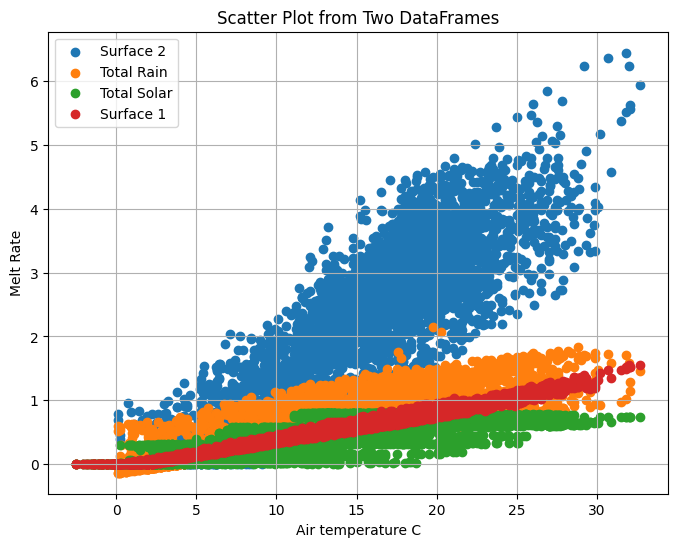

In [64]:
# Generate the scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(df_air_temp, df_SMR_ins2_cond, label='Surface 2')
plt.scatter(df_air_temp, df_SMR_total, label='Total Rain')
plt.scatter(df_air_temp, df_hfmr, label='Total Solar')
plt.scatter(df_air_temp, df_SMR_ins1_cond, label='Surface 1')

plt.title('Scatter Plot from Two DataFrames')
plt.xlabel('Air temperature C')
plt.ylabel('Melt Rate')
plt.legend()
plt.grid()
plt.show()

If this step is not done, the upcoming plot will take a lot of time to render.

With this we convert time from "object" type to "float64", which removes the bottleneck.

In [65]:
# Convert the 'time' column to datetime objects
#df_wo_nan_period_reset['time'] = 

# Convert the datetime objects to Unix timestamps (in seconds) using astype
df_time = pd.to_datetime(df_wo_nan_period_reset['time']).astype('int64') / 1e9

# Display the resulting float64 time column
df_time

0       1.680307e+09
1       1.680311e+09
2       1.680314e+09
3       1.680318e+09
4       1.680322e+09
            ...     
3667    1.693508e+09
3668    1.693512e+09
3669    1.693516e+09
3670    1.693519e+09
3671    1.693523e+09
Name: time, Length: 3672, dtype: float64

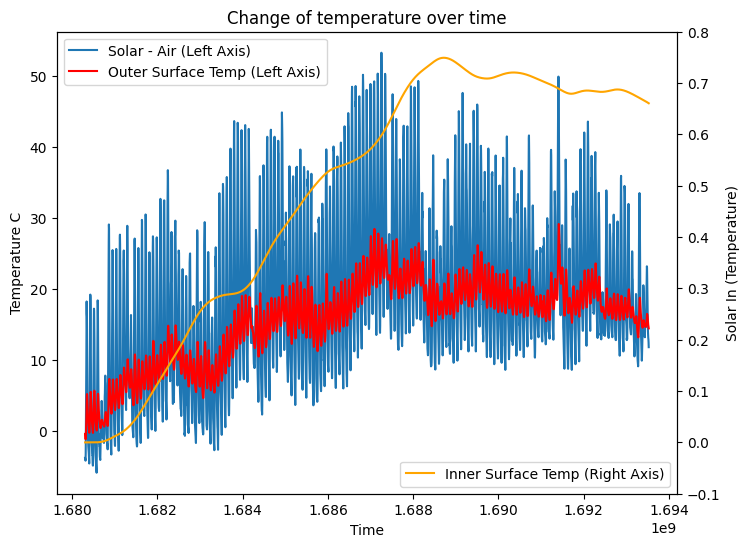

In [66]:
# Generate the scatter plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot df_T_sol_air and df_Tso on the primary y-axis
ax1.plot(df_time, df_T_sol_air, label='Solar - Air (Left Axis)')
ax1.plot(df_time, df_Tso, color = 'red', label='Outer Surface Temp (Left Axis)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature C')
ax1.set_title('Change of temperature over time')
ax1.legend(loc='upper left')

# Create a secondary y-axis and plot df_Tsi on it
ax2 = ax1.twinx()
ax2.plot(df_time, df_Tsi, label='Inner Surface Temp (Right Axis)', color='orange')

# Set the y-axis range for the secondary y-axis
ax2.set_ylim(-0.1, 0.8)
ax2.set_ylabel('Solar In (Temperature)')
ax2.legend(loc='lower right')
plt.show()

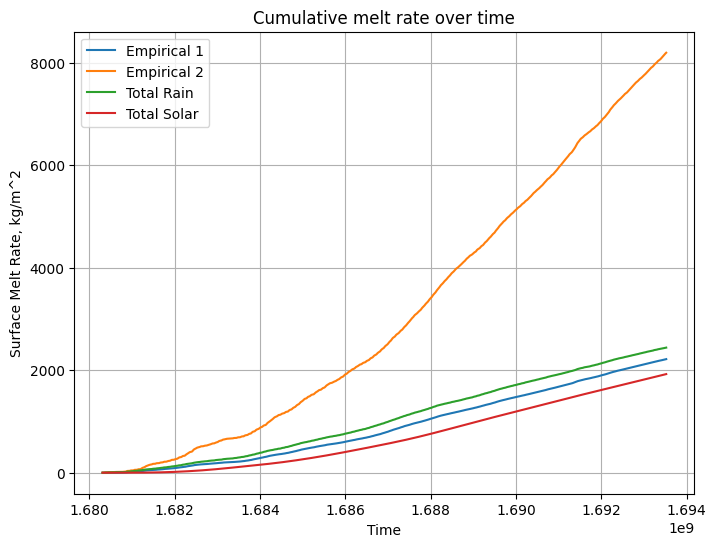

In [67]:
# Generate the scatter plot
plt.figure(figsize=(8, 6))

plt.plot(df_time, df_SMR_ins1_cond_cum, label='Empirical 1')
plt.plot(df_time, df_SMR_ins2_cond_cumsum, label='Empirical 2')
plt.plot(df_time, df_SMR_total_rain_cum, label='Total Rain')
plt.plot(df_time, df_hfmr_cum, label='Total Solar')

plt.title('Cumulative melt rate over time')
plt.xlabel('Time')
plt.ylabel('Surface Melt Rate, kg/m^2')
plt.legend()
plt.grid()
plt.show()

In [68]:
# Define the time frame
start_time = '2023-06-08T00:00'
end_time = '2023-06-13T00:00'

# Filter the DataFrame
time_mask = (df_wo_nan_period_reset['time'] >= start_time) & (df_wo_nan_period_reset['time'] <= end_time)
filtered_df = df_wo_nan_period_reset['time'].loc[time_mask]

# Get the indices
indices = filtered_df.index

# Display the filtered DataFrame and indices
print(filtered_df)
print(indices)

1632    2023-06-08T00:00
1633    2023-06-08T01:00
1634    2023-06-08T02:00
1635    2023-06-08T03:00
1636    2023-06-08T04:00
              ...       
1748    2023-06-12T20:00
1749    2023-06-12T21:00
1750    2023-06-12T22:00
1751    2023-06-12T23:00
1752    2023-06-13T00:00
Name: time, Length: 121, dtype: object
Index([1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641,
       ...
       1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752],
      dtype='int64', length=121)


In [69]:
df_time.loc[time_mask]

1632    1.686182e+09
1633    1.686186e+09
1634    1.686190e+09
1635    1.686193e+09
1636    1.686197e+09
            ...     
1748    1.686600e+09
1749    1.686604e+09
1750    1.686607e+09
1751    1.686611e+09
1752    1.686614e+09
Name: time, Length: 121, dtype: float64

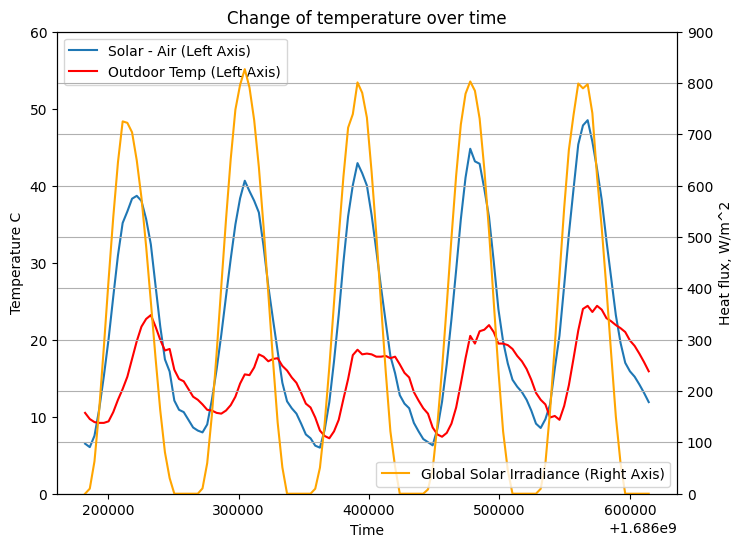

In [70]:
# Generate the scatter plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot df_T_sol_air and df_Tso on the primary y-axis
ax1.plot(df_time.loc[time_mask], df_T_sol_air.loc[time_mask], label='Solar - Air (Left Axis)')
ax1.plot(df_time.loc[time_mask], df_air_temp.loc[time_mask], color = 'red', label='Outdoor Temp (Left Axis)')

ax1.set_ylim(0.0, 60)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature C')
ax1.set_title('Change of temperature over time')
ax1.legend(loc='upper left')

# Create a secondary y-axis and plot df_Tsi on it
ax2 = ax1.twinx()
ax2.plot(df_time.loc[time_mask], df_Gsi.loc[time_mask], label='Global Solar Irradiance (Right Axis)', color='orange')

# Set the y-axis range for the secondary y-axis
ax2.set_ylim(0.0, 900)
ax2.set_ylabel('Heat flux, W/m^2')
ax2.legend(loc='lower right')
plt.grid()
plt.show()

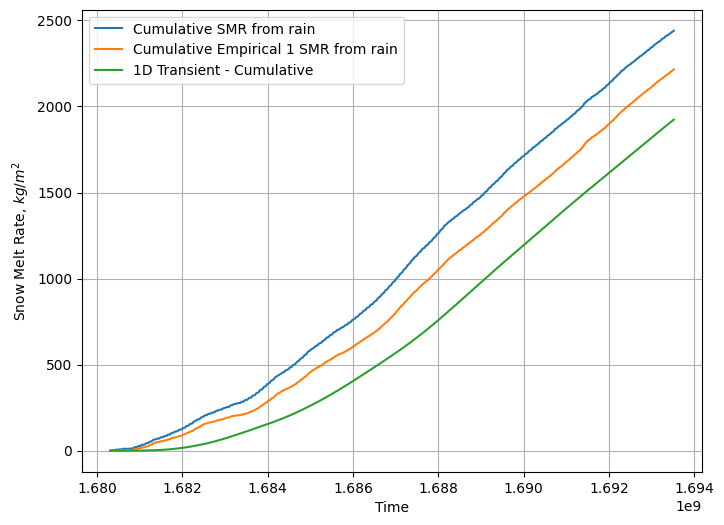

In [71]:
fig, ax = plt.subplots(figsize = (8, 6) )

ax.plot(df_time, df_SMR_total_rain_cum, label='Cumulative SMR from rain')
ax.plot(df_time, df_SMR_ins1_cond_cum, label='Cumulative Empirical 1 SMR from rain')
ax.plot(df_time, df_hfmr_cum, label='1D Transient - Cumulative')

plt.xlabel('Time')
plt.ylabel('Snow Melt Rate, $kg/m^2$')
plt.legend()
plt.grid()
plt.show()